# SIMPLE TABULAR APPROACH(BAD)

In [4]:
import gym
import numpy as np

In [5]:
env=gym.make('FrozenLake-v0')

In [7]:
Q=np.zeros([env.observation_space.n,env.action_space.n])
lr=0.8
y=0.95
num_epis=2000
reward_list=[]
for i in range(num_epis):
    s=env.reset()
    rAll=0
    d=False
    j=0
    while j<99:
        j+=1
        a=np.argmax(Q[s,:]+np.random.randn(1,env.action_space.n)*(1./(i+1)))
        s_new,reward,done,_=env.step(a)
        Q[s,a]=Q[s,a]+lr*(reward+y*np.max(Q[s_new,:])-Q[s,a])
        rAll+=reward
        s=s_new
        if done==True:
            break
        reward_list.append(rAll)

In [9]:
print("Score over time: " +  str(sum(reward_list)/num_epis))

Score over time: 0.0


In [10]:
print("Final Q-Table Values")
print(Q)


Final Q-Table Values
[[6.05779196e-02 1.03359290e-02 8.29260165e-03 8.62423989e-03]
 [1.27123702e-03 4.07090178e-03 1.33938903e-03 2.42136388e-01]
 [5.14550024e-03 2.62142486e-03 4.90118611e-03 3.18952790e-01]
 [1.57155300e-03 1.04618395e-04 3.20602512e-04 1.05107995e-01]
 [1.77766513e-02 2.03287693e-03 9.94585371e-04 6.02755992e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.46879948e-04 4.22854873e-05 2.97919063e-02 6.23825687e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.85959333e-04 1.89182811e-03 2.74067306e-01]
 [3.40986412e-04 2.05347501e-01 0.00000000e+00 9.66727800e-05]
 [6.08696212e-01 1.46814499e-03 1.21674591e-05 3.07464059e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05406396e-03 8.28786693e-01 3.34519851e-04]
 [0.00000000e+00 0.00000000e+00 9.26952627e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

DEEP LEARNING APPROACH(GOOD)

In [11]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
env = gym.make('FrozenLake-v0')

In [13]:
tf.reset_default_graph()

In [14]:
inputs=tf.placeholder(shape=[1,16],dtype=tf.float32)
W=tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout=tf.matmul(inputs,W)
predict=tf.argmax(Qout,1)

In [16]:
nextQ=tf.placeholder(shape=[1,4],dtype=tf.float32)
loss=tf.reduce_sum(tf.square(nextQ-Qout))
trainer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel=trainer.minimize(loss)

In [23]:
init=tf.global_variables_initializer()
y=0.99
e=0.1
num_episodes=2000
jList=[]
rList=[]


In [25]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s=env.reset()
        rAll=0
        d=False
        j=0
        
        while j<99:
            a,allQ=sess.run([predict,Qout],feed_dict={inputs:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0]=env.action_space.sample()
                
            s1,r,d,_=env.step(a[0])
            Q1=sess.run(Qout,feed_dict={inputs:np.identity(16)[s:s+1]})
            maxQ1=np.max(Q1)
            targetQ=allQ
            targetQ[0,a[0]]=r+y*maxQ1
            
            _,W1=sess.run([updateModel,W],feed_dict={inputs:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll+=r
            s=s1
            if d==True:
                e=1./((i/50)+10)
                break
    jList.append(j)
    rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.0%


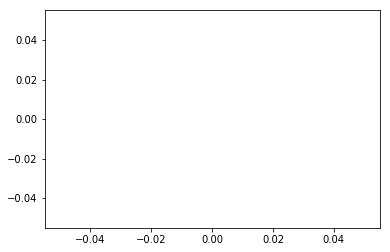

In [26]:
plt.plot(rList)

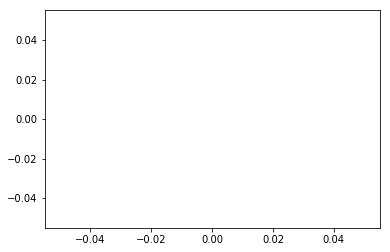

In [27]:
plt.plot(jList)